In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración de dimensiones de las imágenes
IMG_WIDTH, IMG_HEIGHT = 150, 150

# Definir rutas de las carpetas de entrenamiento y validación
train_dir = "C:/Users/adria/ProyectoDL/imgs/train"
validation_dir = "C:/Users/adria/ProyectoDL/imgs/validation"

#Se realiza un preprocesamiento en las images para el entrenamiento y la validación
##Entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizar imágenes
    shear_range=0.2,            # Transformación aleatoria
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True)       # Volteo horizontal de las imágenes

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')    # Modo categórico para múltiples clases
##Validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')



Found 17413 images belonging to 10 classes.
Found 2485 images belonging to 10 classes.


In [3]:
#Arquitectura CNN para extraer las caracteristicas 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Capa final de características

#Con esto generamos una muestra inicial aleatoria para definir el modelo
sample_input = np.random.rand(1, IMG_WIDTH, IMG_HEIGHT, 3)
model.predict(sample_input)#Garantiza que el modelo conozca sus dimensiones de entrada antes de procesar los datos reales

C:\Users\adria\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


array([[0.0660857 , 0.        , 0.        , 0.07513438, 0.08170127,
        0.07975368, 0.04507758, 0.07120116, 0.        , 0.        ,
        0.09629552, 0.        , 0.        , 0.11308108, 0.        ,
        0.        , 0.01982836, 0.        , 0.0085134 , 0.        ,
        0.        , 0.        , 0.08667019, 0.10670823, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06172661,
        0.        , 0.        , 0.07865036, 0.        , 0.        ,
        0.06345895, 0.        , 0.02653974, 0.0326224 , 0.        ,
        0.11219483, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16007659,
        0.14900312, 0.        , 0.08566432, 0.0334287 , 0.        ,
        0.        , 0.        , 0.10993013, 0.10442067, 0.        ,
        0.03422313, 0.04683582, 0.        , 0.        , 0.02662226,
        0.07552049, 0.16064903, 0.        , 0.        , 0.07989275,
        0.0979452 , 0.06033737, 0.        , 0.03

In [ ]:

# Extraer imágenes y etiquetas del generador para usar con KNN
X_train, y_train = [], [] #Se generan listas vacias donde se guardaran las caracteristicas
train_iter = iter(train_generator)  # Crear un iterador explícito para el generador

for i in range(len(train_generator)):#Se comienza con las extraccion de caractetisticas por lotes
    batch = next(train_iter) 
    X_train.extend(batch[0])   # Agregar imágenes al arreglo
    y_train.extend(batch[1])   # Agregar etiquetas al arreglo

X_train = np.array(X_train) #Se requiere convetir los vectores a arreglos numpy que son el formato para trabajr con KNN
y_train = np.array(y_train)


# Extraer características de entrenamiento usando la CNN
features = model.predict(X_train)


In [ ]:
# Separar datos de entrenamiento y validación
X_train_feats, X_val_feats, y_train_labels, y_val_labels = train_test_split(features, y_train, test_size=0.2)

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crea el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  

# Entrena el modelo con los datos de entrenamiento
rf.fit(X_train_feats, y_train_labels.argmax(axis=1))  # Convertir etiquetas one-hot a índice

# Evalua el modelo en el conjunto de validación
y_pred_rf = rf.predict(X_val_feats)
accuracy_rf = accuracy_score(y_val_labels.argmax(axis=1), y_pred_rf)

print(f'Accuracy del Random Forest: {accuracy_rf}')


Accuracy del Random Forest: 0.8171116853287396


In [10]:
# 3. Seleccionar una imagen aleatoria
# Directorio de prueba
test_dir = "C:/Users/adria/ProyectoDL/imgs/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Predicción en el conjunto de prueba
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Reporte de métricas y matriz de confusión
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

print("Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))

Found 2528 images belonging to 10 classes.


ValueError: You must call `compile()` before using the model.

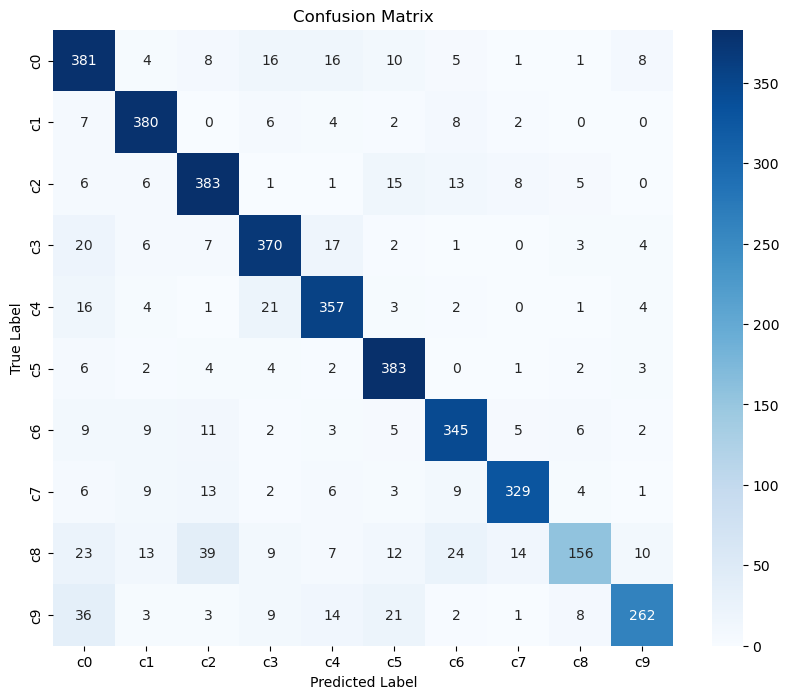

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Genera las predicciones en el conjunto de validación
y_pred = rf.predict(X_val_feats) 
y_true = y_val_labels.argmax(axis=1)  # Convertir etiquetas one-hot a índices
 
class_names = list(train_generator.class_indices.keys())

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'class_names' is not defined

<Figure size 1000x800 with 0 Axes>